#  <center> $\text{Jid}\acute{e}$ $\text{Anene}$  </center>
# <center> ID:3053629 </center>

## Zero-Order Methods

In [345]:
import numpy as np
class ZeroOrder_Algos:
    def __init__(self):
        #Number of random directions to search each step
        self.P = 1000

        #Learning Rate/Tuning Parameter
        self.ALPHA = lambda k: 1 

        #ITERATIONS
        self.K = 8
        
        #Initial point
        self.W0 =np.array([5,5], ndmin=2)

        #Function to minimize
        self.g = lambda w: float(np.tanh(np.dot(w,np.array([4,4], ndmin=2).T))+ \
                           np.max((0.4*(w[0,0]**2), 1))+1)

    #Calculates a 2x1 standardized gaussian norm
    def get_normalized_gaussian(self):
        z = np.random.normal(size = (1,2))
        norm = np.linalg.norm(z)
        return z/norm

    #Puts all of the P random vectors into a list, 
    #and then get canidate values for our process to move to 
    def get_canidates(self, w, k):
        return [self.ALPHA(k)*self.get_normalized_gaussian()+w for i in range(self.P)]

    #Randomized Search Algo
    def random_search(self):
        k = 1
        w = self.W0
        g_val = self.g(w)
        results = []
        
        while k < self.K+1:
            canidates = self.get_canidates(w, k)
            canidate_values = list(map(self.g,canidates))
            feasible_canidates = list(filter(lambda x: x[0] < g_val, zip(canidate_values,canidates)))
            if feasible_canidates == []:
                pass
            else:
                feasible_canidates.append((g_val,w))
                g_val, w = min(feasible_canidates+[(g_val,w)], key = lambda t: t[0])
            
            results.append(g_val)
            k+=1
        return w, g_val, results
    
    #Coordinate Descent
    def coordinate_descent(self):
        k = 1
        w = self.W0
        N = np.size(W0)
        g_val = self.g(w)
        results = []

        while k < self.K+1:
            n=0
            while n<N:
                eye = np.eye(1,N,n)
                left_canidate = eye*self.ALPHA(k)+w
                right_canidate = (-1)*eye*self.ALPHA(k)+w
                canidate_values = map(self.g,[left_canidate,right_canidate])
                feasible_canidates = list(filter(lambda x: x[0] < g_val,\
                                     list(zip(canidate_values,[left_canidate,right_canidate]))))

                if feasible_canidates == []:
                    pass
                else:
                    g_val,w = min(feasible_canidates+[(g_val,w)], key = lambda t: t[0])
                
                results.append(g_val)
                n+=1
            k+=1
        return w, g_val, results

    #Coordinate Search
    def coordinate_search(self):
        k = 1
        w = self.W0
        N = np.size(w)
        g_val = self.g(w)
        results = []

        #Only go along the coordinate axis
        pos_direction = [np.eye(1,N,i) for i in range(0, N)]
        neg_direction = [np.multiply(np.eye(1,N,i),-1) for i in range(0, N)]
        directions = pos_direction + neg_direction

        while k < self.K+1:
            canidates = [d*self.ALPHA(k)+w for d in directions]
            canidate_values = map(self.g,canidates)
            feasible_canidates = list(filter(lambda x: x[0] < g_val,\
                                 list(zip(canidate_values,canidates))))    

            if feasible_canidates == []:
                pass
            else:
                g_val,w = min(feasible_canidates+[(g_val,w)], key = lambda t: t[0])
            
            results.append(g_val)
            k+=1
        return w, g_val, results

**Exercise 1 (2.3): Implement the random search algorithm ** Implement the search algo described in Section 0.6 in Python, and use your implemntation to minimize the function:$g(w_0,w_1)=\tanh(4w_0+4w_1)+\max(0.4w^2_0,1)+1$. Search through P=1000 random directions at each step, $\alpha=1$, a macimum of 8 steps, and an initial point $\vec{w}^0=\begin{bmatrix}2 \\ 2\end{bmatrix}$. Here there is an entire region of global minima exits where $g(w_1,w_2)=1$ the method - as clumsy as it is given the settings - quickly finds a global minumum. Hint: You can easily visualize this function since it only takes in two inputs

When the parameters are set as specified in the problem statement we have the optimal value shown below:





In [364]:
results = ZeroOrder_Algos()
random_search=results.random_search()

print("Random Search alpha Optimal Value:", random_search[2][-1])
print("Random Search alpha Optimal Value:", random_search[0])
print("Number of update steps for Random Search",str(len(random_search[2])))




Random Search alpha Optimal Value: 2.685521610060823
Random Search alpha Optimal Value: [[-1.58489551  1.79252969]]
Number of update steps for Random Search 8


For a sanity check we graph the results when $K=30$ to see if $g(w_1,w_2)=1$

Random Search alpha Optimal Value when K=30: 1.0
Random Search alpha Optimal Value when K=30: [[-1.55004141 -3.35589436]]
Number of update steps for Random Search when K=30: 30


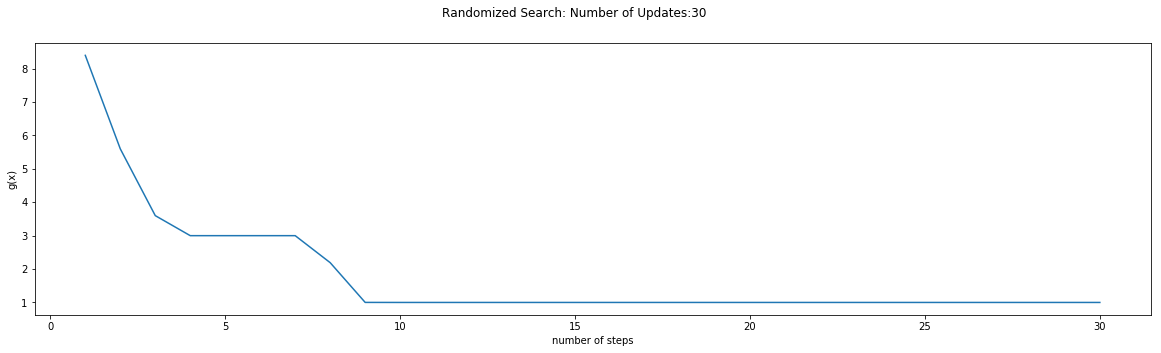

In [367]:
import matplotlib.pyplot as plt

#Check when K=30 that optimal value is 1
results.K=30



rando_search = results.random_search()
print("Random Search alpha Optimal Value when K=30:", rando_search[2][-1])
print("Random Search alpha Optimal Value when K=30:", rando_search[0])
print("Number of update steps for Random Search when K=30:",str(len(rando_search[2])))



xi = list(range(1,len(rando_search[2])+1))
plt.plot( xi, rando_search[2])
plt.suptitle('Randomized Search: Number of Updates:'+str(len(rando_search[2])))
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.rcParams["figure.figsize"]=[20,5]
plt.rcParams["font.size"]=10
plt.show()

**Exercise 2 (2.4): Using the diminishing steplength** In this exercise you will use random search and diminishing steplength to minimize a famous optimization test function called the Rosenbrock function $g(w_0, w_1)=10(w_0-w_1^2)^2+(w_0-1)^2$. This function has a global minimum at the point $\vec{w}^*=\begin{bmatrix}1 \\ 1\end{bmatrix}$. Make two runs of random search using P=1000, the initial point $\vec{w}^*=\begin{bmatrix}-2 \\ -2\end{bmatrix}$, and 50 steps. With the first run using a fixed stepplength $\alpha=1$, the second using a diminishing steplength. Produce some graphical output. 


<br>




Fixed alpha Optimal Value: 0.003062837232400958
Fixed alpha Optimal Value: [[ 1.0545459 -1.0254689]]
Number of update steps for fixed alpha 50 

Variable alpha Optimal Value: 4.8238625288573674e-05
Variable alpha Optimal Value: [[ 1.00694358 -1.00344069]]
Number of update steps for variable alpha 50


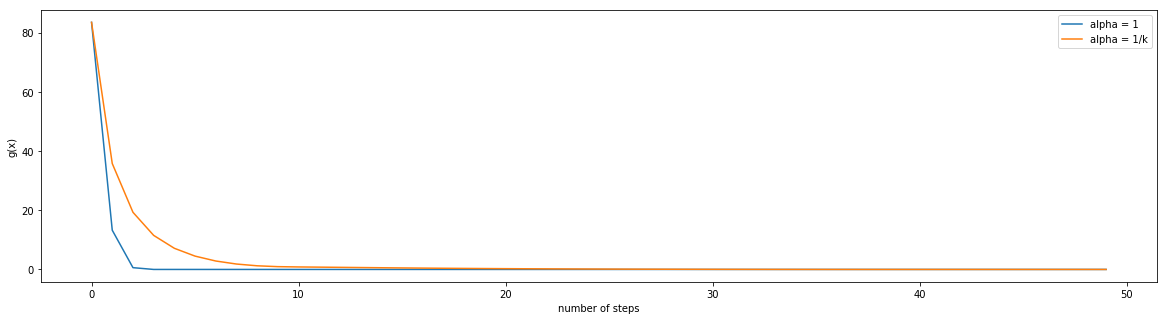

In [363]:


#Helper function to graph two series on same axis
def get_xaxis(series1, series2):
    """
    get_xaxis: list list -> list list list
    Takes as input
    """
    series = max(series1,series2, key = lambda t: len(t))
    if series == series1:
        n= len(series1)
        series2 = series2+ (n-len(series2))*[np.nan]
    else:
        n = len(series2)
        series1 = series1+ (n-len(series1))*[np.nan]
    return series1, series2, list(range(0,n))

results = ZeroOrder_Algos()

#Change to rosenbrock function 
results.g=lambda w: 10*(w[0,0]-w[0,1]**2)**2+(w[0,0]-1)**2

#Change initial to [-2,-2]
results.W0=np.array([-2,-2], ndmin=2)

#Change K 
results.K=50

#Run Random Search w/ Fixed alpha
fixed_alpha_results = results.random_search()

#Change alpha to Variable
results.ALPHA = lambda k: 1/(float(k))

#Run Random Search w/ variable alpha
variable_alpha_results = results.random_search()

#Print Results 
print("Fixed alpha Optimal Value:", fixed_alpha_results[2][-1])
print("Fixed alpha Optimal Value:", fixed_alpha_results[0])
print("Number of update steps for fixed alpha",str(len(fixed_alpha_results[2])),"\n")

print("Variable alpha Optimal Value:", variable_alpha_results[2][-1])
print("Variable alpha Optimal Value:", variable_alpha_results[0])
print("Number of update steps for variable alpha",str(len(variable_alpha_results[2])))

#Graph Results
fixed_results, variable_results, xi = get_xaxis(fixed_alpha_results[2], variable_alpha_results[2])
plt.plot(xi, fixed_results, label='alpha = 1')
plt.plot(xi, variable_results, label='alpha = 1/k')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[20,5]
plt.rcParams["font.size"]=10
plt.show()



**Exercise 3 (2.9): Coordinate Search vs Coordinate descent** Implement the coordinate search and coordinate descent algos when $g(w_0,w_1)=0.26(w_0^2+w_1^2)-0.48w_0w_1$. (Not much detail of the initial parameters in the 0.6 example?). We will first start our analysis when $K=20$ initialized at $\vec{w}^*=\begin{bmatrix}4 \\ 4\end{bmatrix}$. 

Coordinate Search Optimal Value when k= 20 is : 0.29184527559892404
Coordinate Search Optimal Input Value when k= 20 is : [[2.7000778  2.70218254]]
Number of update steps for Coordinate Search 20 

Coordinate Descent Optimal Value when k= 20 is : 0.07865336276590085
Coordinate Descent Optimal Input Value when k= 20 is : [[1.40226034 1.40226034]]
Number of update steps for Coordinate Descent 40


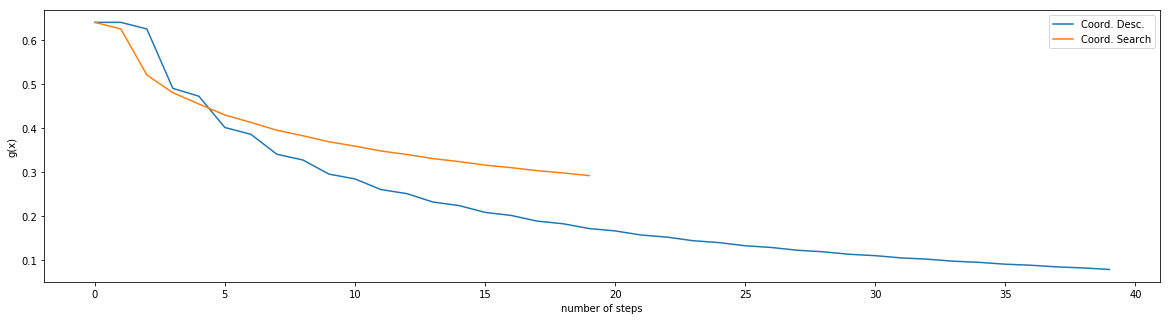

In [362]:
#Change to K=20 and check out coordinate search
results.K = 20
coord_search = results.coordinate_search()
coord_desc = results.coordinate_descent()

print("Coordinate Search Optimal Value when k=",results.K,"is :", coord_search[2][-1])
print("Coordinate Search Optimal Input Value when k=",results.K,"is :", coord_search[0])
print("Number of update steps for Coordinate Search",str(len(coord_search[2])),"\n")

print("Coordinate Descent Optimal Value when k=",results.K,"is :", coord_desc[2][-1])
print("Coordinate Descent Optimal Input Value when k=",results.K,"is :", coord_desc[0])
print("Number of update steps for Coordinate Descent",str(len(coord_desc[2])))

#Graph Results
c_desc, c_search, xi = get_xaxis(coord_desc[2], coord_search[2])
plt.plot( xi, c_desc, label='Coord. Desc.')
plt.plot( xi, c_search,label='Coord. Search')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[20,5]
plt.rcParams["font.size"]=10
plt.show()

We now change to K=40. 

Coordinate Search Optimal Value: 0.22292165927563135
Coordinate Search Optimal Input Value: [[2.36104617 2.3604108 ]]
Number of update steps for Coordinate Search 40 

Coordinate Descent Optimal Value: 0.020820005866686392
Coordinate Search Optimal Input Value: [[0.72145696 0.72145696]]
Number of update steps for Coordinate Descent 80


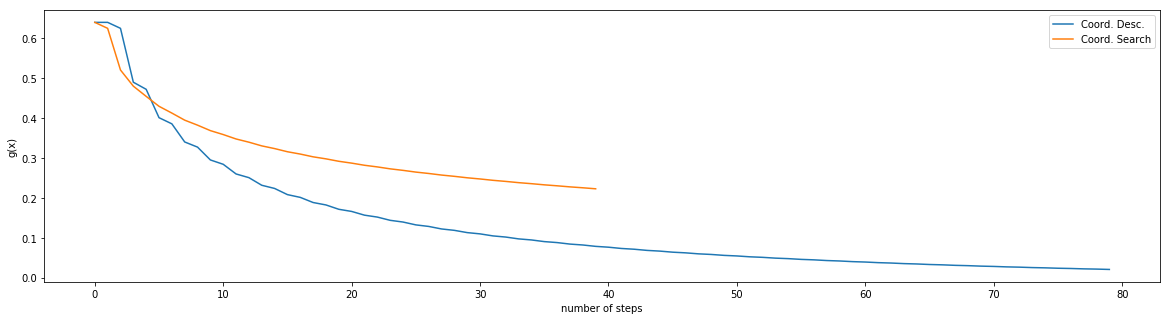

In [361]:
results = ZeroOrder_Algos()

#Learning Rate/Tuning Parameter
results.ALPHA = lambda k: 1/k

#Change to new function
results.g=lambda w: 0.26*(w[0,0]**2+w[0,1]**2)-0.48*w[0,0]*w[0,1]
#ITERATIONS
results.K = 40
#Initial point
results.W0 =np.array([4,4], ndmin=2)

#Run the two algorithms
coord_desc = results.coordinate_descent()
coord_search = results.coordinate_search()

#Print the Results
print("Coordinate Search Optimal Value:", coord_search[2][-1])
print("Coordinate Search Optimal Input Value:", coord_search[0])
print("Number of update steps for Coordinate Search",str(len(coord_search[2])),"\n")

print("Coordinate Descent Optimal Value:", coord_desc[2][-1])
print("Coordinate Search Optimal Input Value:", coord_desc[0])
print("Number of update steps for Coordinate Descent",str(len(coord_desc[2])))

#Graph Results
c_desc, c_search, xi = get_xaxis(coord_desc[2], coord_search[2])
plt.plot( xi, c_desc, label='Coord. Desc.')
plt.plot( xi, c_search,label='Coord. Search')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[20,5]
plt.rcParams["font.size"]=10
plt.show()

## First Order Methods

**Exercise 4 (3.1): First order condition calculations** Use the first order sufficency condtions to find the critical points of the function $g(w)=w\log{w}+(1-w)\log{1-w}$ where $w\in [0,1].$ <br>
\begin{align*}
\frac{dg(w)}{dw} &= \log(w)+ w\frac{1}{w}-\log(1-w)-(1-w)\frac{1}{1-w}\\
 &= \log(w)-\log(1-w) = \log(\frac{w}{1-w})
\end{align*}
Sufficiency condition: 
\begin{align*}
 \log(\frac{w^*}{1-w^*}) =0 &\iff \exp(\log(\frac{w^*}{1-w^*})) =\exp(0)
 \iff \frac{w^*}{1-w^*} =1\Rightarrow w^*= 0 
\end{align*}

Find critical points of the following function $g(\mathbf{w})=\frac{1}{2}\mathbf{w}^T\mathbf{B}\mathbf{w}+\mathbf{w}^T\mathbf{c} , \mathbf{B}=\begin{bmatrix}2 & 1 \\ 1 & 3\end{bmatrix}, \mathbf{c} =\begin{bmatrix}1 \\ 1\end{bmatrix}$

\begin{align*}
\nabla g(\mathbf{w}) &= \mathbf{B}\mathbf{w}+ \mathbf{c}\\
&= \begin{bmatrix}2w_0 +w_1 \\ w_0 + 3w_1\end{bmatrix} + \begin{bmatrix}1 \\ 1\end{bmatrix}
\end{align*}
Sufficiency condition: 
\begin{align*}
%
\nabla g(\mathbf{w}^*)&= \begin{bmatrix}2 & 1 \\ 1 & 3\end{bmatrix}\begin{bmatrix}w_0^* \\ 
w_1^*\end{bmatrix} = \begin{bmatrix}-1 \\ -1\end{bmatrix} \\
%
\begin{bmatrix}w_0^* \\ w_1^*\end{bmatrix} &= \begin{bmatrix}2 & 1 \\ 1 & 3\end{bmatrix}^{-1}\begin{bmatrix}-1 \\ -1 \end{bmatrix}\\
%
\begin{bmatrix}w_0^* \\ w_1^*\end{bmatrix} &= \frac{1}{2*3-1*1}\begin{bmatrix}3 & -1 \\ -1 & 2\end{bmatrix}\begin{bmatrix}-1 \\ -1 \end{bmatrix}\\
%
&=  \frac{1}{5}\begin{bmatrix}-2 \\ -1\end{bmatrix} \\
%
\begin{bmatrix}w_0^* \\ w_1^*\end{bmatrix} &=\begin{bmatrix}-\frac{2}{5} \\
-\frac{1}{5}\end{bmatrix}
\end{align*}

Find critical points of the following function $g(w)=\log(1+e^w)$<br>
\begin{align*}
\frac{dg(w)}{dw}=\frac{e^w}{1+e^w}
\end{align*}
Sufficiency condition:
\begin{align*}
\frac{dg(w^*)}{dw}=\frac{e^{w^*}}{1+e^{w^*}} = 0 \Rightarrow \text{NO SOLUTION!}
\end{align*}

Find critical points of the following function $g(w)=w\tanh(w) = w\frac{\sinh w}{\cosh w}$<br>

$\frac{\partial}{\partial w}(w\tanh(w))= \tanh(w)+w\text{sech}(w)^2$. The first order sufficiency conditions must satisfy the following: $0=\tanh(w^*)+w^*\text{sech}(w^*)^2$, which holds true iff $w^*=0$.






**Exercise 5 (3.2): Stationary points of a simply but common quadreatic function** A number of applications will find us employing a simple multiquadratic $g(\mathbf{w})= a +\mathbf{b}^T\mathbf{w}+\mathbf{w}^T\mathbf{C}\mathbf{w}$ where the matrix $\mathbf{C}=\frac{1}{\beta}\mathbf{I}$. Here $\mathbf{I}$ is the $N\times N$ idendity matrix, and $\beta >0$ a positive scalar. Show that the single stationary point of this quadratic is unlike a general quadratic - not the solution to a linear system but can be expreseed in closed form rather simply.  <br>

Taking the derivative we have $\nabla g(\mathbf{w})= \mathbf{b^T} + \mathbf{w^T}\mathbf{C}$. The first order optimality conditions yield $ \mathbf{w^{*T}}\mathbf{C} =-\mathbf{b^T}$. Since the diagonals of $\mathbf{C}$ are positive and since $\mathbf{C}$ is a diagonal matrix it follows that $\mathbf{C}$ has all positive eigenvalues therefore $\mathbf{C}^{-1}$ exists. Clearly the following closed form solution must hold:
\begin{align*}
\mathbf{w^{*T}}=-\mathbf{b^T}\mathbf{C}^{-1}
\end{align*}

**Exercise 6 (3.5): Coordinate descent is a local optimization scheme*** Express the coordinate descent method as a local optimization scheme in the general  for described in section ??. That is, as a sequence of steps of the from $\mathbf{w}^k=\mathbf{w}^{k-1}+\alpha \mathbf{d}^k$

**input** initial point $\mathbf{w}^0$, maximum number of steps $K$, a step length $\alpha$
* **for**  $k = 1\dots K$ 
    * **for**  $n = 1\dots N$
        * find $s_n = \frac{\partial g(w)}{\partial w_n}|_{{w_{-n}}={w_{-n}}}=0$ 
        * set $\mathbf{d}^{k+n} = \mathbf{e}_n s_n$
        * form new point $\mathbf{w}^{k+n}=\mathbf{w}^{k+n-1}+\alpha \mathbf{d}^{k+n}$
        * **if** $g(\mathbf{w}^{k+n})<g(\mathbf{w}^{k+n+1})$
            * $\mathbf{w^{k+n+1}} \leftarrow \mathbf{w}^{k+n}$
* output: history of weights $\{\mathbf{w}^b\}^{KN}_{b=0}$ and corresponding function evaluations $\{g(\mathbf{w}^b)\}^{KN}_{b=0}$


**Exercise 7 (3.6): Try out gradient descent** Run gradient descent to minimize the following function $g(w)= \frac{1}{50}(w^4+w^2+10w)$ with initial point $w_0=2$ and 1000 iterations. Make three runs using each of the steplength values: $\alpha =1$, $ \alpha =\frac{1}{10}$$, \alpha =\frac{1}{100}$. Compute the derivative of this function by hand, and implement it (and the functiion itself) in Python using numpy. Note that $\frac{dg(w)}{dw}=\frac{1}{50}(4w^3+2w^1+10)$.<br>

Gradient Descent[alpha=1] Optimal Value: -0.16996928446309353
Gradient Descent[alpha=1] Optimal Input Value: -1.2347728250532968
Number of update steps for Gradient Descent[alpha=1] 1001 

Gradient Descent[alpha=1/10] Optimal Value: -0.16996928446309353
Gradient Descent[alpha=1/10] Optimal Input Value: -1.2347728250532943
Number of update steps for Gradient Descent[alpha=1/10] 1001 

Gradient Descent[alpha=1/100] Optimal Value: -0.12249665467157385
Gradient Descent[alpha=1/100] Optimal Input Value: -0.6801417679333529
Number of update steps for Gradient Descent[alpha=1/100] 1001 



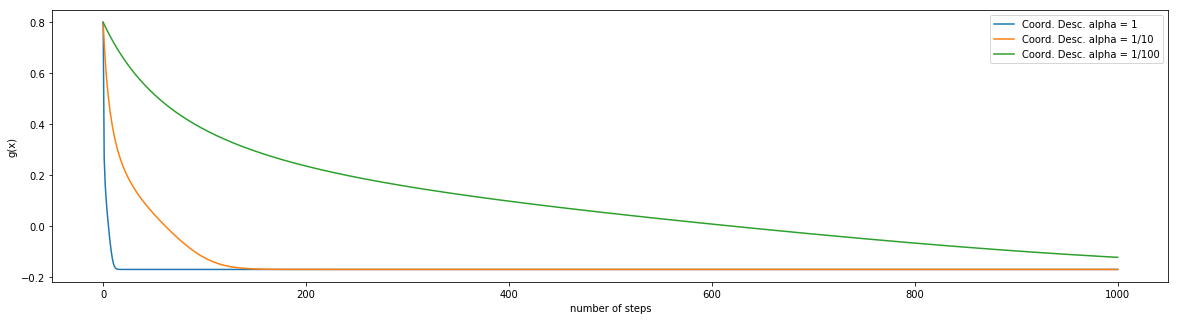

In [373]:
#Gradient Descent Algorithm
def gradient_descent(g, dwdg, K, alpha,  W0):
    k = 1
    w = np.copy(W0)
    g_val = g(w)
    results = [g_val]

    while k < K+1:
        w = w-dwdg(w)*alpha(k)
        results.append(g(w))
        k+=1
    return w, g_val, results

#Function we are minimizing
g=lambda w : (1/float(50))*(w**4+w**2+10*w)

#Derivative function 
dwdg = lambda w: (1/float(50))*(4*w**3+2*w+10)

#Intial Value
w_0 = 2

#Iterations
K = 1000

#Alpha = 1
alpha1 = lambda k: 1

#Alpha = 1/10
alpha10 = lambda k: 1/float(10)

#Alpha = 1/100
alpha100 = lambda k: 1/float(100)

#Run gradient descent for alpha in {1, 1/10 , 1/100 }
gradient_descent_1 = gradient_descent(g, dwdg, K, alpha1,  w_0)
gradient_descent_10 = gradient_descent(g, dwdg, K, alpha10,  w_0)
gradient_descent_100 = gradient_descent(g, dwdg, K, alpha100,  w_0)

#Print the Results
print("Gradient Descent[alpha=1] Optimal Value:", gradient_descent_1[2][-1])
print("Gradient Descent[alpha=1] Optimal Input Value:", gradient_descent_1[0])
print("Number of update steps for Gradient Descent[alpha=1]",str(len(gradient_descent_1[2])),"\n")

print("Gradient Descent[alpha=1/10] Optimal Value:", gradient_descent_10[2][-1])
print("Gradient Descent[alpha=1/10] Optimal Input Value:", gradient_descent_10[0])
print("Number of update steps for Gradient Descent[alpha=1/10]",str(len(gradient_descent_10[2])),"\n")

print("Gradient Descent[alpha=1/100] Optimal Value:", gradient_descent_100[2][-1])
print("Gradient Descent[alpha=1/100] Optimal Input Value:", gradient_descent_100[0])
print("Number of update steps for Gradient Descent[alpha=1/100]",str(len(gradient_descent_100[2])),"\n")

#Graph Results
g_desc_1, g_desc_10, xi = get_xaxis(gradient_descent_1[2], gradient_descent_10[2])
g_desc_10, g_desc_100, xi = get_xaxis(g_desc_10, gradient_descent_100[2])
plt.plot( xi, g_desc_1, label='Coord. Desc. alpha = 1')
plt.plot( xi, g_desc_10,label='Coord. Desc. alpha = 1/10')
plt.plot( xi, g_desc_100,label='Coord. Desc. alpha = 1/100')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[20,5]
plt.rcParams["font.size"]=10
plt.show()



**Exercise 8 (3.9): Oscillation in the cost function history plot** Show the results of three runs of gradient descent to minimize the function 
$g(\mathbf{w})=w_0^2+w_1^2+2sin(\frac{3}{2}(w_0+w_2))^2+2$. Notice that a local min is around $\begin{bmatrix}1.5 \\ 1.5 \end{bmatrix}$ and the global is near $\begin{bmatrix}-0.5 \\ -0.5 \end{bmatrix}$. All three runs start at the same initial point $\mathbf{w}^0=\begin{bmatrix}3 \\ 3\end{bmatrix}$ and take 10 steps. The first run uses $\alpha = 10^{-2}$, second uses $\alpha=10^{-1}$, and the third $\alpha = 1$. 



Gradient Descent[alpha=1] Optimal Value: 74.43957890555701
Gradient Descent[alpha=1] Optimal Input Value: [[-5.96199272 -5.96199272]]
Number of update steps for Gradient Descent[alpha=1] 11 

Gradient Descent[alpha=1/10] Optimal Value: 3.967091299505268
Gradient Descent[alpha=1/10] Optimal Input Value: [[0.929536 0.929536]]
Number of update steps for Gradient Descent[alpha=1/10] 11 

Gradient Descent[alpha=1/100] Optimal Value: 18.367499360357282
Gradient Descent[alpha=1/100] Optimal Input Value: [[2.68845036 2.68845036]]
Number of update steps for Gradient Descent[alpha=1/100] 11 



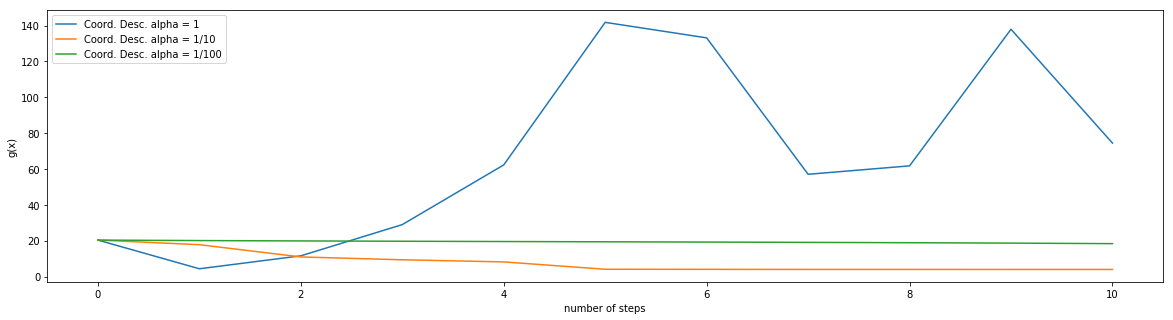

In [374]:
import autograd.numpy as np
# Import statement for gradient calculator
from autograd import grad

#Objective Function
g= lambda w: w[0,0]**2+w[0,1]**2+2*np.sin(1.5*(w[0,0]+w[0,1]))**2+2

#Derivative Function
dwdg = grad(g)

#Initial point
w_0 =np.array([3.0,3.0], ndmin=2)

#Iterations
K = 10

#Alpha = 1
alpha1 = lambda k: 1

#Alpha = 1/10
alpha10 = lambda k: 1/float(10)

#Alpha = 1/100
alpha100 = lambda k: 1/float(100)

#Run gradient descent for alpha in {1, 1/10 , 1/100 }
gradient_descent_1 = gradient_descent(g, dwdg, K, alpha1,  w_0)
gradient_descent_10 = gradient_descent(g, dwdg, K, alpha10,  w_0)
gradient_descent_100 = gradient_descent(g, dwdg, K, alpha100,  w_0)


#Print the Results
print("Gradient Descent[alpha=1] Optimal Value:", gradient_descent_1[2][-1])
print("Gradient Descent[alpha=1] Optimal Input Value:", gradient_descent_1[0])
print("Number of update steps for Gradient Descent[alpha=1]",str(len(gradient_descent_1[2])),"\n")

print("Gradient Descent[alpha=1/10] Optimal Value:", gradient_descent_10[2][-1])
print("Gradient Descent[alpha=1/10] Optimal Input Value:", gradient_descent_10[0])
print("Number of update steps for Gradient Descent[alpha=1/10]",str(len(gradient_descent_10[2])),"\n")

print("Gradient Descent[alpha=1/100] Optimal Value:", gradient_descent_100[2][-1])
print("Gradient Descent[alpha=1/100] Optimal Input Value:", gradient_descent_100[0])
print("Number of update steps for Gradient Descent[alpha=1/100]",str(len(gradient_descent_100[2])),"\n")

#Graph Results
g_desc_1, g_desc_10, xi = get_xaxis(gradient_descent_1[2], gradient_descent_10[2])
g_desc_10, g_desc_100, xi = get_xaxis(g_desc_10, gradient_descent_100[2])
plt.plot( xi, g_desc_1, label='Coord. Desc. alpha = 1')
plt.plot( xi, g_desc_10,label='Coord. Desc. alpha = 1/10')
plt.plot( xi, g_desc_100,label='Coord. Desc. alpha = 1/100')
plt.xlabel('number of steps')
plt.ylabel('g(x)')
plt.legend()
plt.rcParams["figure.figsize"]=[20,5]
plt.rcParams["font.size"]=10
plt.show()
